In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Data in

In [180]:
os.listdir('./kaggle')

['input']

In [181]:
os.listdir('./kaggle/input/campqmind-hackathon-2022')

['sample_submission.csv', 'test', 'train']

In [182]:
# Since our data is comprised of images, we have to load each image from each directory and store them into arrays
# 136, 102

# This function returns all the filenames in the chosen directory
def get_files(directory):
    files = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(dirname, filename))
    return files

train = []
labels = []

# Alternate:
# train = np.zeros(shape(num_of_valid_images, their dimensions (102x136), 3: x, y, rgb))
# labels = np.zeros(shape(num_of valid_labels, 1))
for file in get_files('./kaggle/input/campqmind-hackathon-2022/train/'):
    img = cv2.imread(file)
    img_array = np.asarray(img)
    if img_array.shape != (102, 136, 3):
        continue
    train.append(img_array)
    category = file.split('\\')[-2].split('/')[-1]
    if category == "Shoe":
        labels.append(0)
    elif category == "Boot":
        labels.append(1)
    else:
        labels.append(2)

test = []
for file in get_files('./kaggle/input/campqmind-hackathon-2022/test/'):
    img = cv2.imread(file)
    img_array = np.asarray(img)
    test.append(img_array)
    
# We have to use a plotting function and cv2 to show the image from the array data
print(len(train))
print(len(labels))

10498
10498


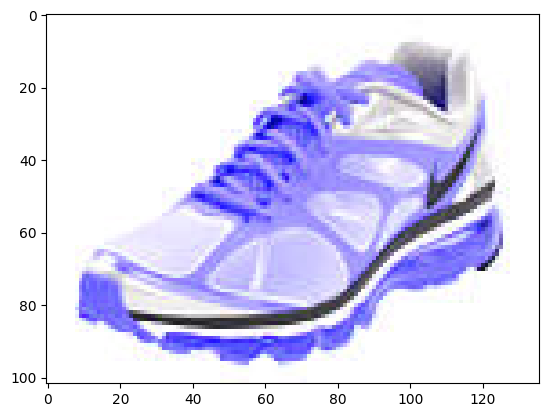

In [183]:
# display an image using matplotlib and cv2
plt.imshow(train[7543])

In [184]:
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]

In [185]:

model = tf.keras.Sequential()
#136 width 102 height, 3 dimension.
model.add(tf.keras.layers.Conv2D(32, 3, 3,activation = 'relu', input_shape = (102,136,3)))
model.add(tf.keras.layers.Conv2D(32, 3, 3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2, 2)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 34, 45, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 15, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1120)              0         
                                                                 
 dense_31 (Dense)            (None, 32)                35872     
                                                                 
 dense_32 (Dense)            (None, 3)                 99        
                                                     

In [186]:
train_np = np.asarray(train)
print(train_np.shape)
test_np = np.asarray(test)
labels_np = tf.keras.utils.to_categorical(labels, 3)


(10498, 102, 136, 3)


In [187]:
np_train = np.array(train)

In [188]:
np_train.shape

(10498, 102, 136, 3)

In [189]:
model.fit(np_train, labels_np, epochs=10)

Epoch 1/10
329/329 [==============================] - 11s 32ms/step - loss: 1.8747
Epoch 2/10
329/329 [==============================] - 11s 32ms/step - loss: 0.4138
Epoch 3/10
329/329 [==============================] - 10s 32ms/step - loss: 0.3038
Epoch 4/10
329/329 [==============================] - 10s 32ms/step - loss: 0.2262
Epoch 5/10
329/329 [==============================] - 10s 32ms/step - loss: 0.1799
Epoch 6/10
329/329 [==============================] - 11s 32ms/step - loss: 0.1577
Epoch 7/10
329/329 [==============================] - 10s 32ms/step - loss: 0.1309
Epoch 8/10
329/329 [==============================] - 10s 32ms/step - loss: 0.1157
Epoch 9/10
329/329 [==============================] - 10s 32ms/step - loss: 0.1110
Epoch 10/10
329/329 [==============================] - 11s 34ms/step - loss: 0.0988


SyntaxError: invalid syntax (3450957844.py, line 2)

# Creating a Submission

In [ ]:
# creating a dataframe to submit
# 'Id' should have the image names, 'Categories' should have the name of the class
submisson = pd.DataFrame(0, index=np.arange(0, 4500), columns=['Id', 'Categories'])
# create a csv
submisson.to_csv('/kaggle/working/submission.csv', index=False)

OSError: Cannot save file into a non-existent directory: '\kaggle\working'